In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [126]:
df= pd.read_csv("Hotel Reservations.csv")
# df.drop(columns='Booking_ID', inplace=True)
# print(df['type_of_meal_plan'].unique())
# print(df['room_type_reserved'].unique())
# print(df['market_segment_type'].unique())
# print(df['booking_status'].unique())
# print(df.isna().sum())
df.drop(columns=['Booking_ID','type_of_meal_plan','room_type_reserved','market_segment_type'], inplace=True)
df['booking_status']=df['booking_status'].replace({'Not_Canceled':0,'Canceled':1})
df=df[0:1000]
df['arrival_year']=df['arrival_year'].replace({2017:0, 2018:1} )
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,224,0,10,2,0,0,0,65.00,0,0
1,2,0,2,3,0,5,1,11,6,0,0,0,106.68,1,0
2,1,0,2,1,0,1,1,2,28,0,0,0,60.00,0,1
3,2,0,0,2,0,211,1,5,20,0,0,0,100.00,0,1
4,2,0,1,1,0,48,1,4,11,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,1,2,0,273,1,5,13,0,0,0,95.00,0,1
996,1,0,0,1,0,4,0,10,13,0,0,0,0.00,0,0
997,1,0,0,1,0,79,1,12,22,0,0,0,86.40,1,0
998,2,0,2,3,0,57,0,9,19,0,0,0,66.53,1,0


In [23]:

# sns.pairplot(df, hue='booking_status')


In [127]:
k=5
kf= KFold(n_splits=k, shuffle=True,random_state=42)
df['month_encoded']=0.0
df['date_encoded']=0.0
for train_idx,value_idx in kf.split(df):
    train_set, val_set= df.iloc[train_idx], df.iloc[value_idx]
    mean_target= train_set.groupby('arrival_month')['booking_status'].mean()
    df.loc[value_idx,'month_encoded']=df.loc[value_idx,'arrival_month'].map(mean_target).astype("float64")

for train_idx,value_idx in kf.split(df):
    train_set, val_set= df.iloc[train_idx], df.iloc[value_idx]
    mean_target= train_set.groupby('arrival_date')['booking_status'].mean()
    df.loc[value_idx,'date_encoded']=df.loc[value_idx,'arrival_date'].map(mean_target).astype("float64")    



In [129]:
# df.drop(columns='arrival_month', inplace=True)
# df.drop(columns='arrival_date', inplace=True)
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,month_encoded,date_encoded
0,2,0,1,2,0,224,0,0,0,0,65.00,0,0,0.308333,0.166667
1,2,0,2,3,0,5,1,0,0,0,106.68,1,0,0.321429,0.424242
2,1,0,2,1,0,1,1,0,0,0,60.00,0,1,0.228571,0.347826
3,2,0,0,2,0,211,1,0,0,0,100.00,0,1,0.261538,0.192308
4,2,0,1,1,0,48,1,0,0,0,94.50,0,1,0.309859,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,0,1,2,0,273,1,0,0,0,95.00,0,1,0.261538,0.222222
996,1,0,0,1,0,4,0,0,0,0,0.00,0,0,0.333333,0.289474
997,1,0,0,1,0,79,1,0,0,0,86.40,1,0,0.189655,0.260870
998,2,0,2,3,0,57,0,0,0,0,66.53,1,0,0.220000,0.320000


scalable feature no_of_week_nights
scalable feature lead_time
scalable feature avg_price_per_room


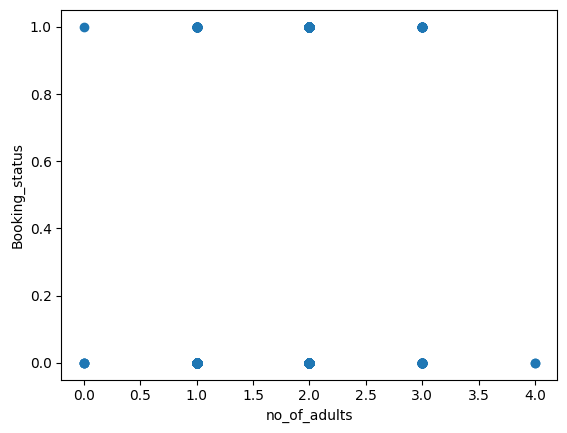

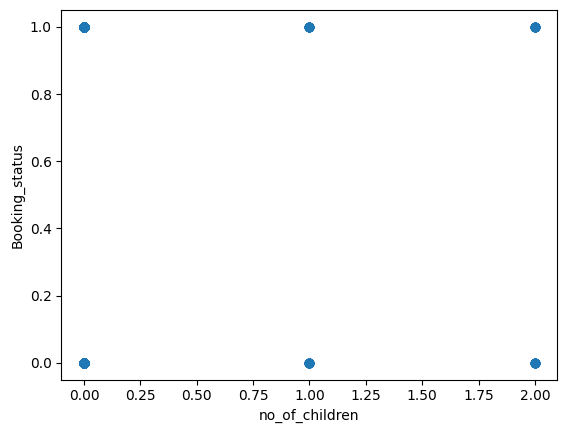

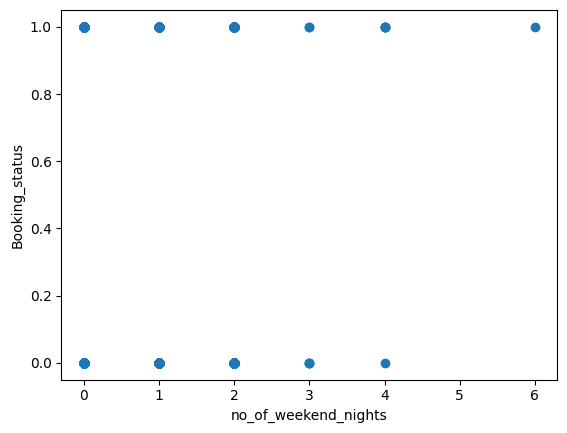

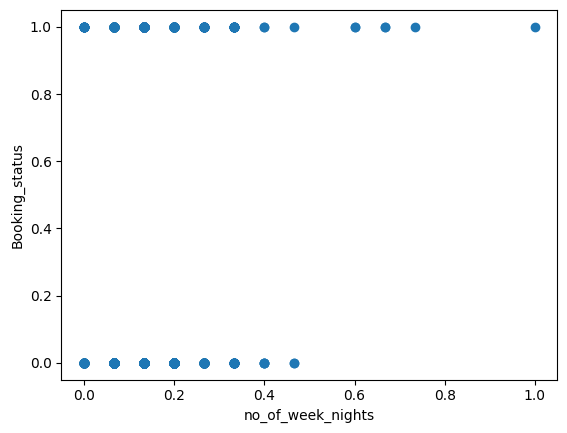

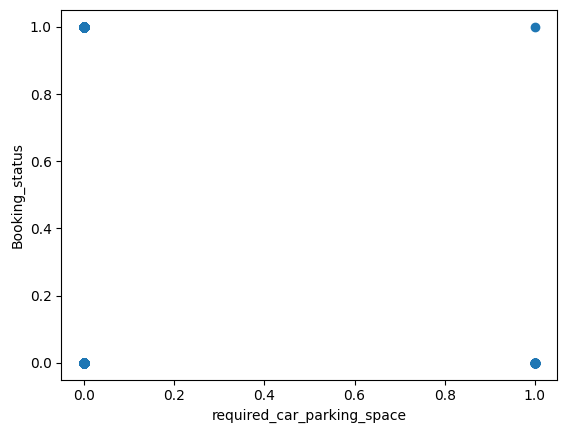

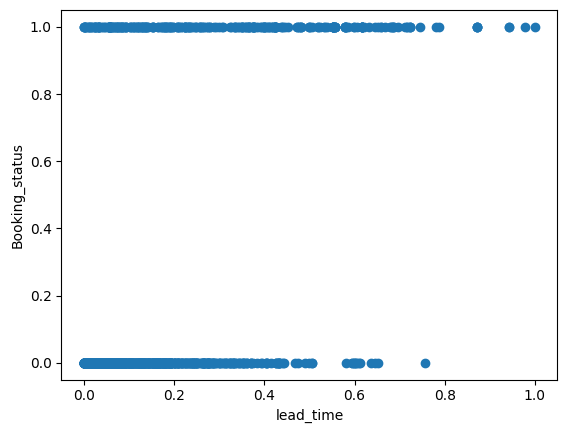

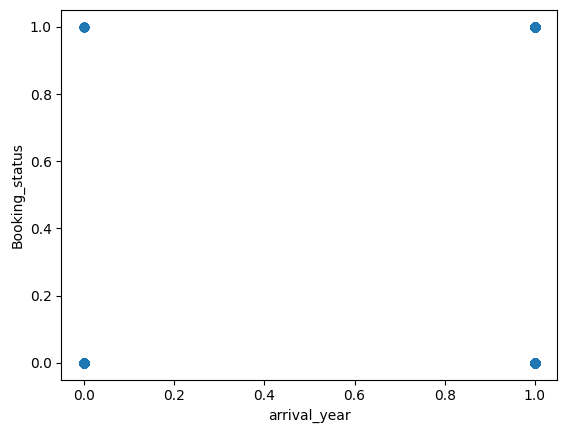

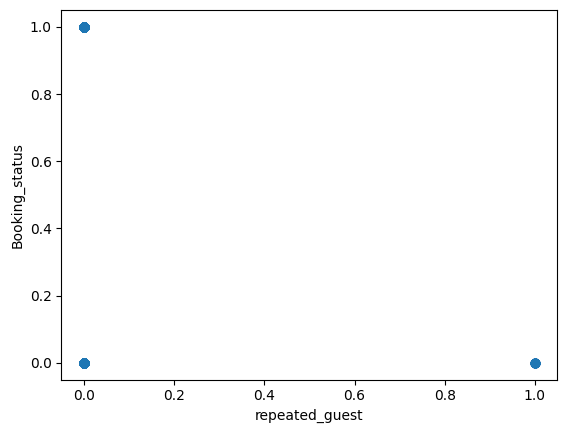

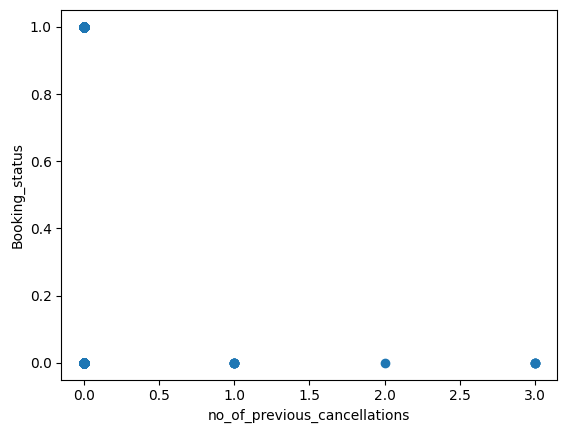

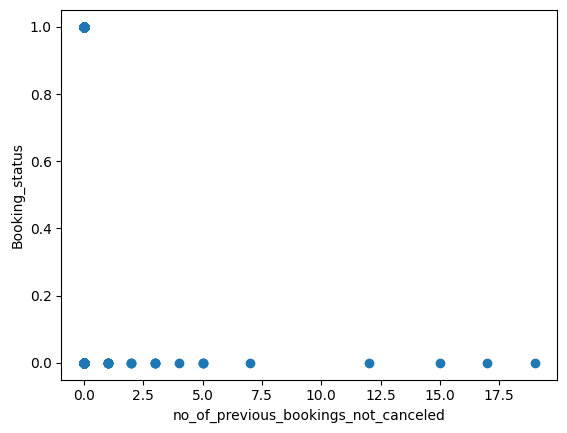

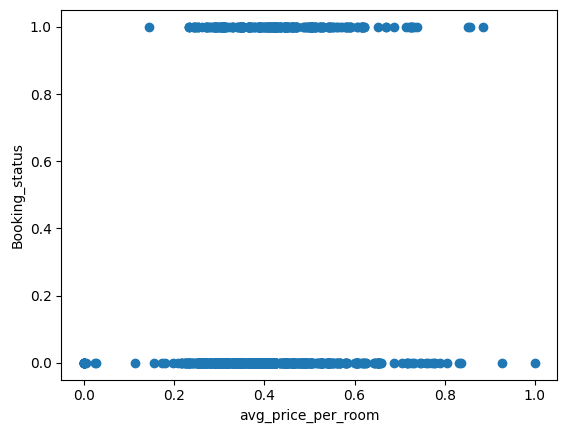

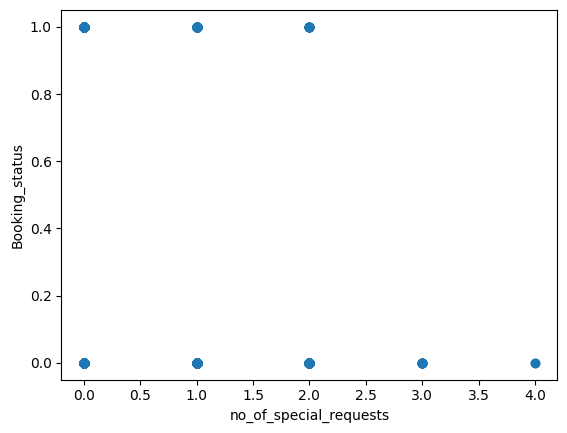

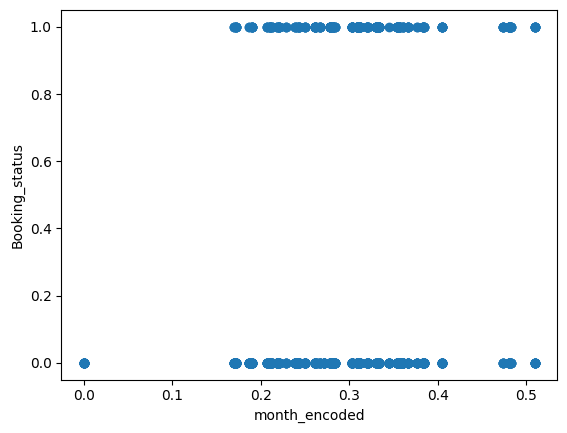

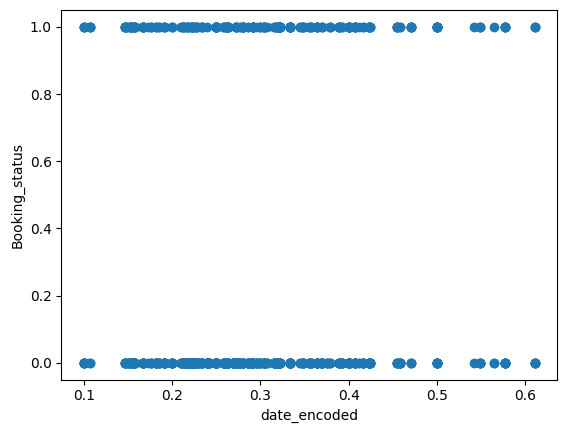

In [136]:
df= df.astype(float)
Y_lab= df['booking_status']
X_lab= df.drop(columns='booking_status')

for i in range(0,len(X_lab.columns)):
    Z_max, Z_min, Z_avg=X_lab.iloc[:,i].max(), X_lab.iloc[:,i].min(), X_lab.iloc[:,i].mean()
    if(Z_avg>=2):
        print('scalable feature', X_lab.columns[i])
        X_lab.iloc[:,i]= (X_lab.iloc[:,i]- Z_min)/(Z_max- Z_min)


for i in range(0, len(X_lab.columns)):
    plt.scatter(X_lab.iloc[:,i], Y_lab)
    plt.xlabel(X_lab.columns[i])
    plt.ylabel('Booking_status')
    plt.show()

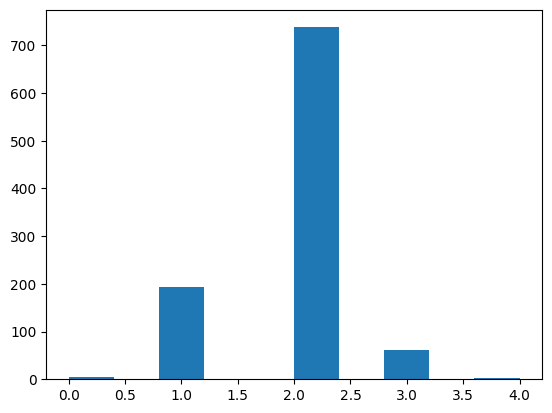

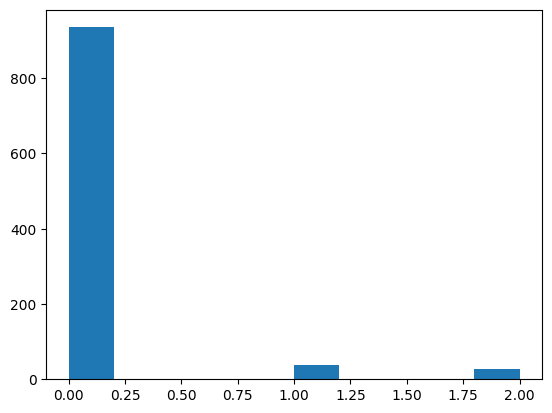

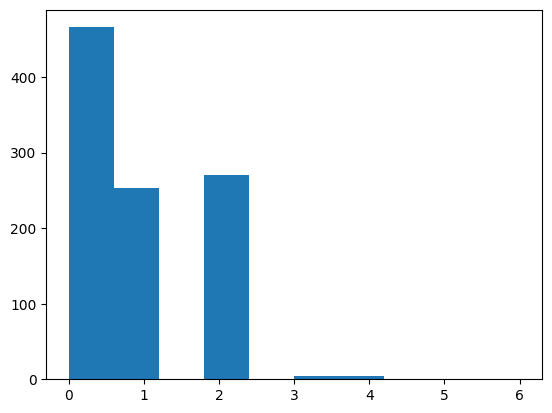

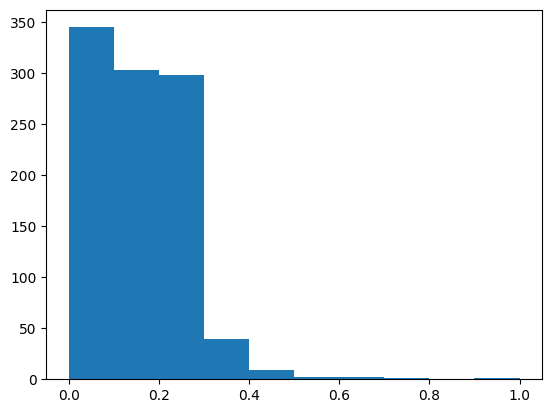

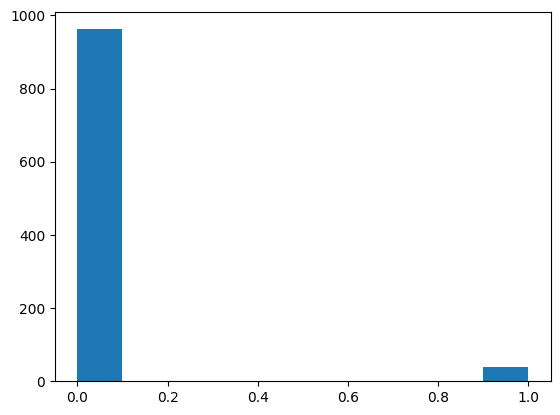

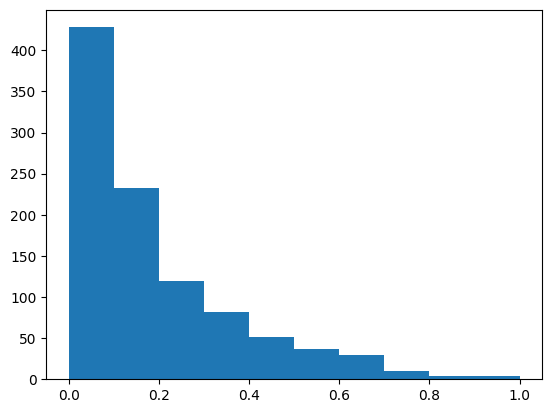

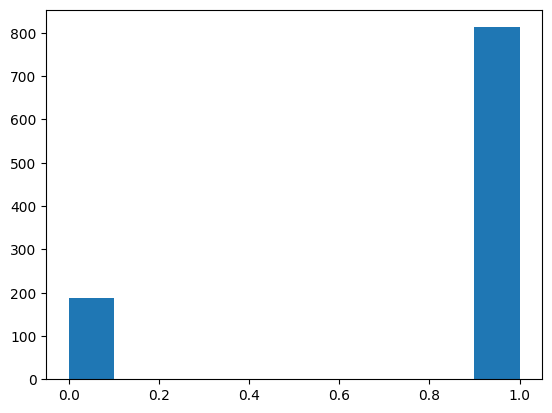

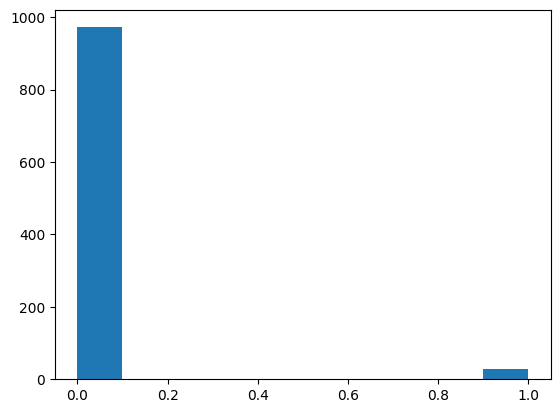

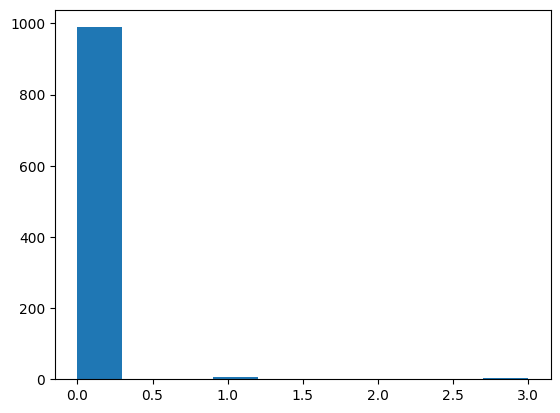

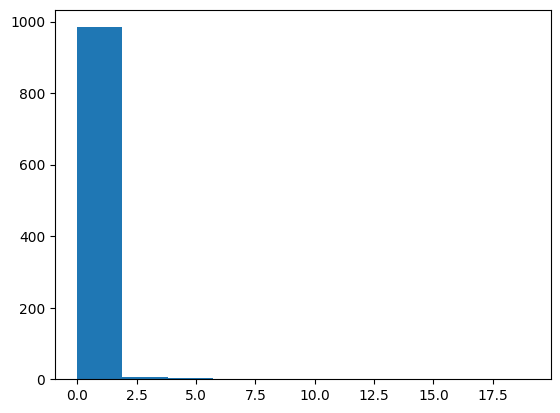

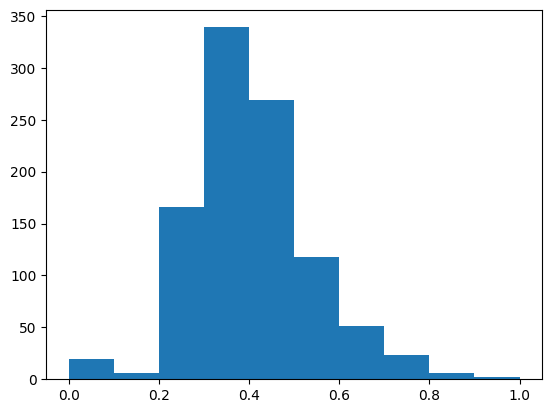

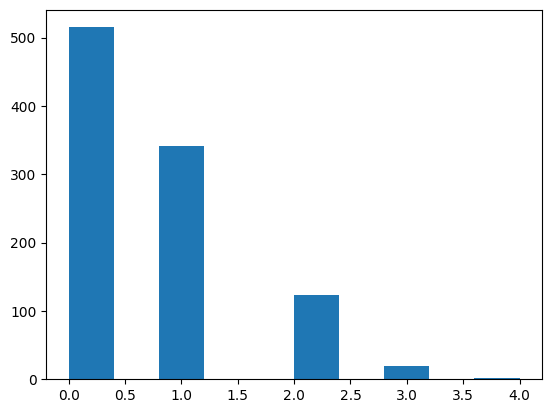

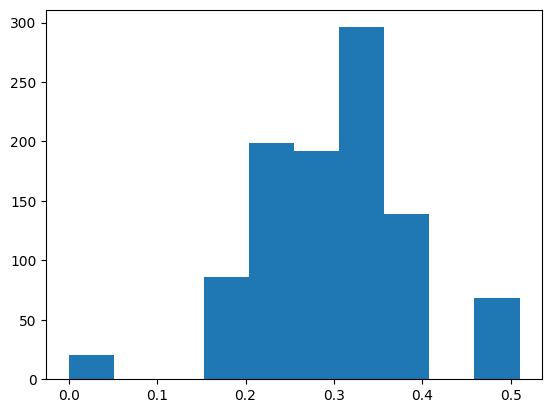

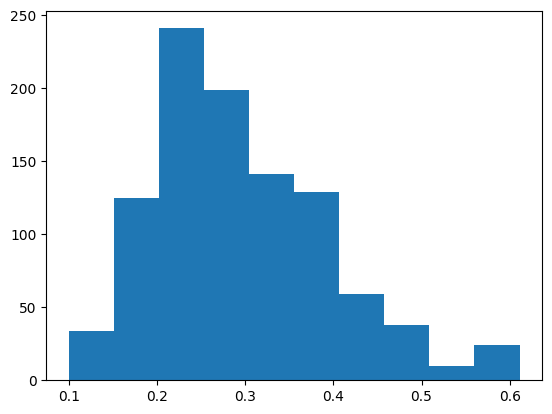

In [51]:
for i in range(0, len(X_lab.columns)):
    plt.hist(X_lab.iloc[:,i])
    plt.show()

In [131]:
log_reg= linear_model.LogisticRegression()
X_train, X_test, Y_train,Y_test= train_test_split(X_lab,Y_lab, train_size=0.9)
log_reg.fit(X_train, Y_train)
y_log_reg_pred= log_reg.predict(X_test)
accuracy_score(Y_test, y_log_reg_pred)

0.85

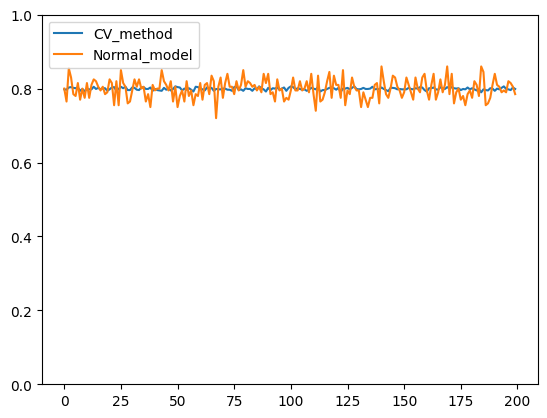

In [135]:
def k_fold_CV(X_train, X_test, Y_train,Y_test, model):
    model.fit(X_train, Y_train)
    y_pred= model.predict(X_test)
    acc_score= accuracy_score(Y_test, y_pred)
    return acc_score

def k_fold_data(X_lab,Y_lab, model):
    CV_score=[]
    kf= KFold(n_splits=5, shuffle=True)
    for train_idx, test_idx in kf.split(X_lab):
        X_train,Y_train= X_lab.iloc[train_idx], Y_lab.iloc[train_idx]
        X_test,Y_test= X_lab.iloc[test_idx], Y_lab.iloc[test_idx]
        CV_score.append(k_fold_CV(X_train, X_test, Y_train,Y_test, model))
    return np.mean(CV_score)    


log_reg= linear_model.LogisticRegression()
score_CV, score_log_reg=[],[]
x_num=[]
for i in range(0,200):
    score_CV.append(k_fold_data(X_lab,Y_lab,log_reg))
    X_train, X_test, Y_train,Y_test= train_test_split(X_lab,Y_lab, train_size=0.8)
    log_reg.fit(X_train, Y_train)
    y_log_reg_pred= log_reg.predict(X_test)
    score_log_reg.append(accuracy_score(Y_test, y_log_reg_pred))
    x_num.append(i)

plt.plot(x_num,score_CV, label='CV_method')
plt.plot(x_num,score_log_reg, label='Normal_model')
plt.ylim(0,1)
plt.legend()
